# MiBiPreT example: Isotope analysis using Griftpark data

Lambda plot of isotopes reproducing Figure 3.10 in the PhD thesis of *Suzanne Faber*, 2023, 'Field investigations and reactive transport modelling of biodegrading coal tar compounds at a complex former manufactured gas plant'

The data was provided on personal basis by Suzanne Faber.

## Background: Griftpark contaminant site

Text to be added.

## Data Analysis

Text to be added.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mibiscreen as mbs

### Data handling

**Load in data:**

Returns loaded data as DataFrame. Will be reported when verbose flag is `True`. 

In [3]:
file_csv = "./grift_BTEXIIN_isotopes.csv"
isotopes_raw,units = mbs.load_csv(file_csv, verbose = False)
isotopes,units = mbs.standardize(isotopes_raw, reduce = True, verbose = False)

________________________________________________________________


### Isotope Analysis: Lambda-plots

#### Lambda plot for single compound and all well data

(<Figure size 375x280 with 1 Axes>,
 <Axes: xlabel='$\\delta^{{13}}$C', ylabel='$\\delta^2$H'>)

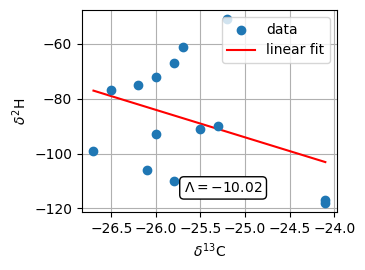

In [5]:
molecule = 'benzene'

x,y = mbs.extract_isotope_data(isotopes,molecule)
results = mbs.Lambda_regression(x,y,validate_indices = True)
mbs.Lambda_plot(**results)

#print(results)

#### Lambda plot for single compound and split up on wells

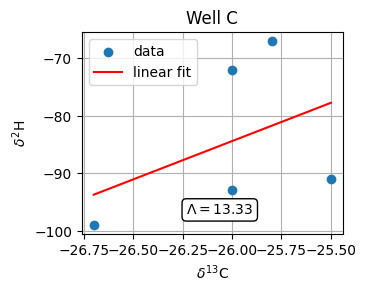

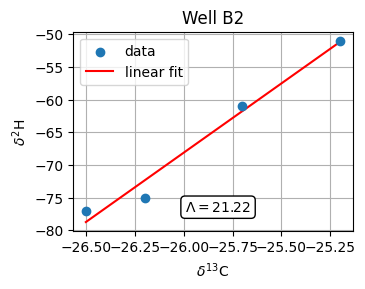

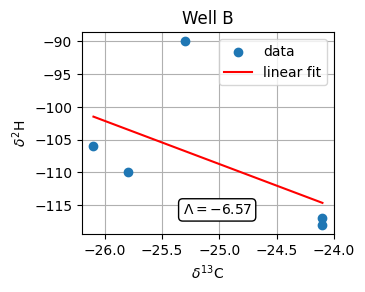

In [6]:
wells = ['C','B2','B']

for i,well in enumerate(wells):
    data = isotopes[isotopes["obs_well"] == well]
    x,y = mbs.extract_isotope_data(data,molecule)
    results = mbs.Lambda_regression(x,y,validate_indices = True)
    mbs.Lambda_plot(**results)
    plt.title('Well '+well)

#### Lambda plot for single compound and split up on wells

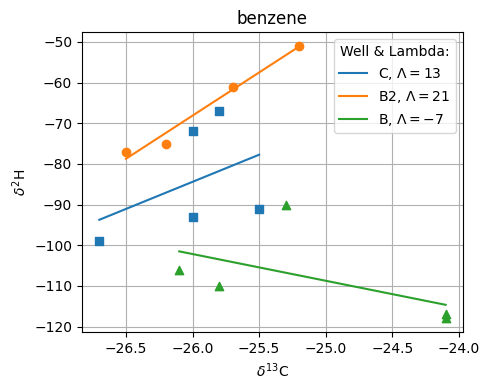

In [7]:
wells = ['C','B2','B']
mto = ['s','o','^','<','>','d','*']

plt.figure(figsize = [5,4])
for i,well in enumerate(wells):
    data = isotopes[isotopes["obs_well"] == well]
    x,y = mbs.extract_isotope_data(data,molecule)
    results = mbs.Lambda_regression(x,y,validate_indices = True)

    plt.scatter(x, y, marker=mto[i],zorder = 3)
    if len(x)>2:
        # Create a trendline
        polynomial = np.poly1d(results['coefficients'])
        trendline_x = np.linspace(np.min(results['delta_C']), np.max(results['delta_C']), 50)
        trendline_y = polynomial(trendline_x)
        plt.plot(trendline_x, trendline_y, label=r'{}, $\Lambda = {:.0f}$'.format(well,results['coefficients'][0]))

plt.title(molecule)
plt.grid(True,zorder = 0)
plt.legend(title = 'Well & Lambda:')
plt.xlabel(r'$\delta^{{13}}$C')
plt.ylabel(r'$\delta^2$H')

plt.tight_layout()
plt.savefig("example_01_grift_isotopes_{}.png".format(molecule),dpi=300)

#### Lambda plot for selected compounds and split up on wells

/home/godsnor/code/mibiscreen/mibiscreen/analysis/reduction/stable_isotope_regression.py:78: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data1, data2, 1)
/home/godsnor/code/mibiscreen/mibiscreen/analysis/reduction/stable_isotope_regression.py:78: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(data1, data2, 1)


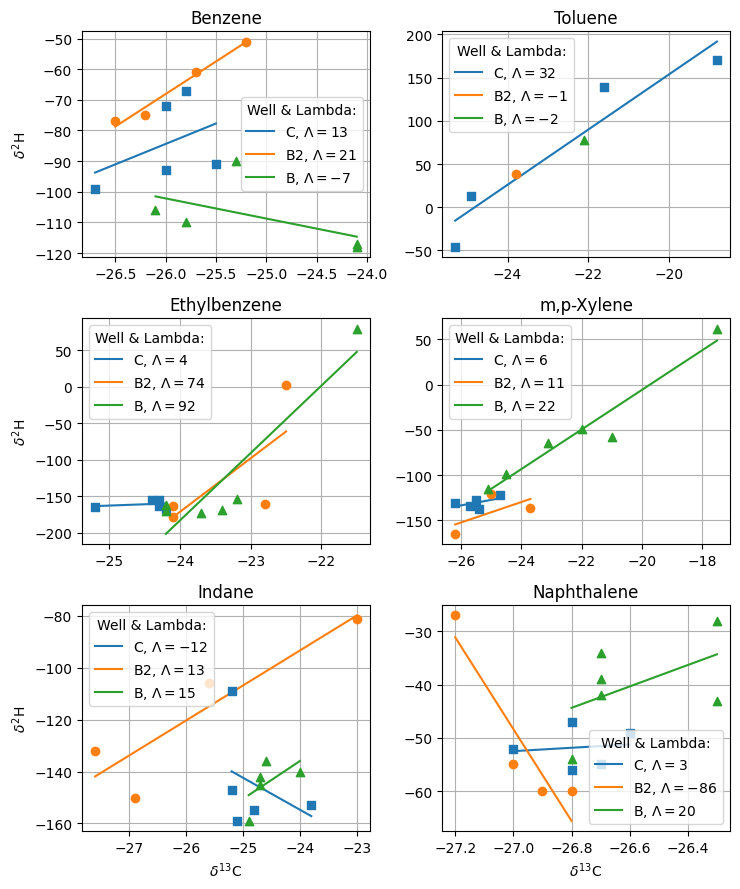

In [9]:
### Figure settings
wells = ['C','B2','B']
mto = ['s','o','^','<','>','d','*']
molecules = ['Benzene','Toluene','Ethylbenzene','m,p-Xylene','Indane','Naphthalene']

fig, axes = plt.subplots(figsize=[7.5,9],ncols = 2, nrows = 3)
ax = axes.flat
for j,molecule in enumerate(molecules):
    for i,well in enumerate(wells):
        data = isotopes[isotopes["obs_well"] == well]
        x,y = mbs.extract_isotope_data(data,molecule)
        results = mbs.Lambda_regression(x,y,validate_indices = True)
        # Plot the scatter plot
        ax[j].scatter(x, y, marker=mto[i],zorder = 3)
        if len(x)>2:
            # Create a trendline
            polynomial = np.poly1d(results['coefficients'])
            trendline_x = np.linspace(np.min(results['delta_C']),
                                      np.max(results['delta_C']),
                                      50)
            trendline_y = polynomial(trendline_x)
            ax[j].plot(trendline_x, trendline_y,
                       label=r'{}, $\Lambda = {:.0f}$'.format(well,results['coefficients'][0]))

        ax[j].set_title(molecule)
        ax[j].grid(True,zorder = 0)
        ax[j].legend(title = r'Well & Lambda:')
        if j%2 == 0:
            ax[j].set_ylabel(r'$\delta^2$H')
        if j >= len(ax)-2:
            ax[j].set_xlabel(r'$\delta^{{13}}$C')

fig.tight_layout()
#plt.savefig('example_01_grift_isotopes.pdf')